In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

plt.style.use('ggplot')
pd.set_option('display.max_columns',24)
pd.set_option('display.max_colwidth',None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [5]:
data=pd.read_excel("Superstore.xlsx")
data.head(3)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [6]:
data=data.drop('Row ID',axis=1)

data=data[[ 
        'Order ID', 
        'Order Date', 
        'Ship Date', 
        'Ship Mode', 
    #'Customer ID',
    #'Customer Name', 
        'Segment', 
    #'Country', 
        'City', 
        'State', 
    #'Postal Code',
        'Region', 
    #'Product ID', 
        'Category', 
        'Sub-Category', 
        'Product Name',
        'Sales', 
        'Quantity', 
        'Discount', 
        'Profit']]
data.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2013-152156,2013-11-09,2013-11-12,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.0000,41.9136
1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400,3,0.0000,219.5820
2,CA-2013-138688,2013-06-13,2013-06-17,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200,2,0.0000,6.8714


In [10]:
data.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Segment', 'City',
       'State', 'Region', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'net_profit', 'month', 'year', 'year_month',
       'total_discount_in_dollars', 'selling_price',
       '(net)_profit_before_discount', 'order_fulfillment_time',
       'net_profit_per_unit_sold', 'profit_margin', 'discounted_sales'],
      dtype='object')

In [17]:
# Rename 'Profit' to 'net_profit' first
data = data.rename(columns={'Profit': 'net_profit'})  

# Extract specific date values from 'Order Date'
data['month'] = data['Order Date'].dt.month  
data['year'] = data['Order Date'].dt.year  
data['year_month'] = data['Order Date'].dt.to_period('M')  

# Feature engineering
data['total_discount_in_dollars'] = data['Sales'] * data['Discount']  
data['selling_price'] = data['Sales'] / data['Quantity']  
data['(net)_profit_before_discount'] = data['Sales'] * data['Discount'] + data['net_profit']  
data['order_fulfillment_time'] = data['Ship Date'] - data['Order Date']  
data['net_profit_per_unit_sold'] = data['net_profit'] / data['Quantity']  
data['profit_margin'] = (data['net_profit'] / data['Sales']) * 100  
data['discounted_sales'] = data['Sales'] - (data['Discount'] * data['Sales'])  


In [18]:
data.describe()

,Sales,Quantity,Discount,net_profit,month,year,total_discount_in_dollars,selling_price,(net)_profit_before_discount,order_fulfillment_time,net_profit_per_unit_sold,profit_margin,discounted_sales
count,9994.0000,9994.0000,9994.0000,9994.0000,9994.0000,9994.0000,9994.0000,9994.0000,9994.0000,9994,9994.0000,9994.0000,9994.0000
mean,229.8580,3.7896,0.1562,28.6569,7.8146,2012.7229,32.2776,60.9196,60.9345,3 days 23:00:46.828096858,7.7994,12.0314,197.5804
std,623.2451,2.2251,0.2065,234.2601,3.2860,1.1240,164.0256,142.9274,248.7399,1 days 17:55:49.143486104,56.0750,46.6754,539.0453
min,0.4440,1.0000,0.0000,-6599.9780,1.0000,2011.0000,0.0000,0.3360,-3449.9885,0 days 00:00:00,-1319.9956,-275.0000,0.0888
25%,17.2800,2.0000,0.0000,1.7288,5.0000,2012.0000,0.0000,5.4700,4.7754,3 days 00:00:00,0.7228,7.5000,14.3360
50%,54.4900,3.0000,0.2000,8.6665,9.0000,2013.0000,1.0368,16.2700,14.6352,4 days 00:00:00,2.7670,27.0000,45.9232
75%,209.9400,5.0000,0.2000,29.3640,11.0000,2014.0000,14.8704,63.9400,50.3280,5 days 00:00:00,8.7032,36.2500,180.1765
max,22638.4800,14.0000,0.8000,8399.9760,12.0000,2014.0000,11319.2400,3773.0800,9508.1616,7 days 00:00:00,1679.9952,50.0000,17499.9500


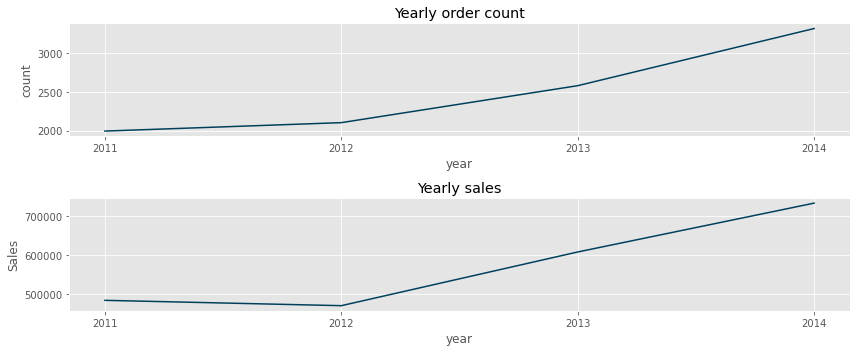

In [19]:
plt.figure(figsize=(12,5))

plt.subplot(211)
data.groupby(['year'])['Order Date'].count().plot(c='#003f5c')
plt.ylabel('count')
plt.xticks(data.groupby(['year'])['Order Date'].count().index)
plt.title('Yearly order count')

plt.subplot(212)
data.groupby('year')['Sales'].sum().plot(c='#003f5c')
plt.ylabel('Sales')
plt.xticks(data.groupby('year')['Sales'].sum().index)
plt.title('Yearly sales')

plt.tight_layout()
plt.show()

In [20]:
print('Annual total sales: ')
data.groupby('year')['Sales'].sum()

Annual total sales: 


year
2011   484247.4981
2012   470532.5090
2013   608473.8300
2014   733947.0232
Name: Sales, dtype: float64

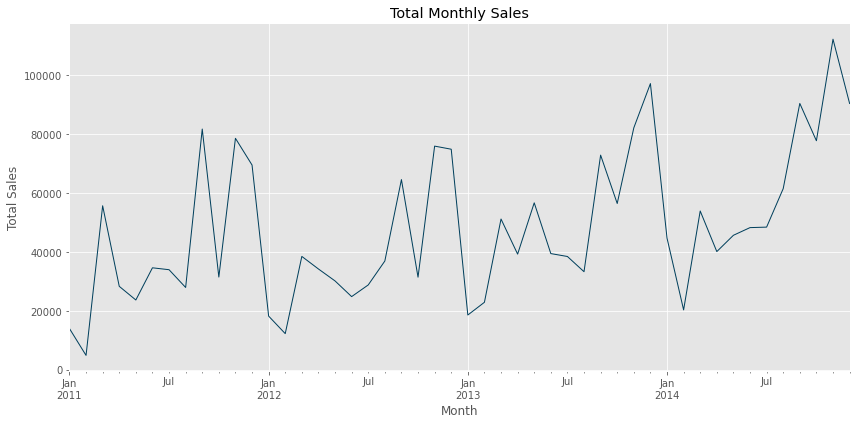

In [21]:
data.groupby('year_month')['Sales'].sum().plot(c='#003f5c',linewidth=1,figsize=(12,6))
plt.title('Total Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')

plt.tight_layout()
plt.show()

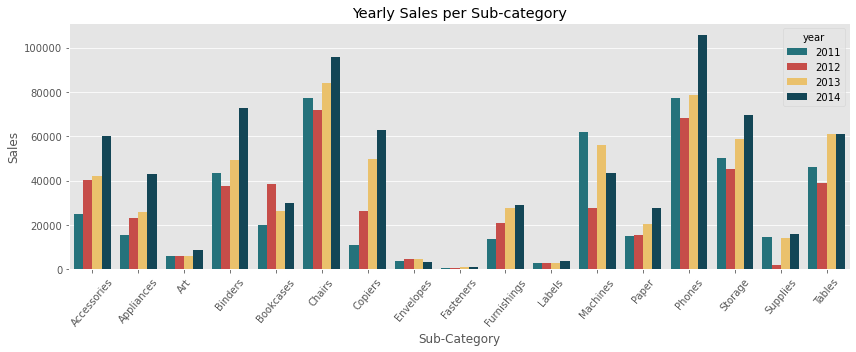

In [22]:
yearly_sales=pd.DataFrame(data.groupby(['Sub-Category','year'])['Sales'].sum()).reset_index()
yearly_sales

plt.figure(figsize=(12,5))
sns.barplot(data=yearly_sales,x='Sub-Category',y='Sales',hue='year',palette=['#177e89','#db3a34','#ffc857','#084c61'])
plt.xticks(rotation=50)
plt.title('Yearly Sales per Sub-category')

plt.tight_layout()
plt.show()

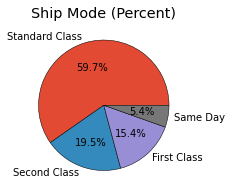

In [23]:
i3=data['Ship Mode'].value_counts()/len(data)*100
i3

plt.figure(figsize=(5,3))
plt.pie(i3,labels=i3.index,autopct='%.1f%%',textprops={'fontsize':10},wedgeprops={'edgecolor': 'black'})
plt.title('Ship Mode (Percent)')

plt.show()

Sales                           1.0000
discounted_sales                0.9705
selling_price                   0.8894
(net)_profit_before_discount    0.8536
total_discount_in_dollars       0.6102
net_profit                      0.4791
net_profit_per_unit_sold        0.4473
Quantity                        0.2008
profit_margin                   0.0034
month                           0.0001
year                           -0.0098
Discount                       -0.0282
Name: Sales, dtype: float64


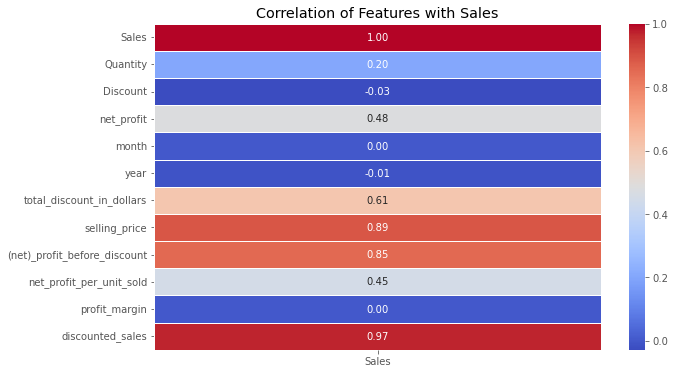

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = data.corr()

# Display the correlation with Sales only
sales_correlation = correlation_matrix['Sales'].sort_values(ascending=False)

# Print Sales correlation values
print(sales_correlation)

# Plot correlation heatmap focused on Sales
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix[['Sales']], annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation of Features with Sales")
plt.show()
